# What is a Perceptron ?

The idea of a *Perceptron* is analogous to the operating principle of the basic processing unit of the brain - *Neuron*. A *neuron* is comprised of many input signals carried by the *dendrites*, the cell body (or *nucleus*) and one output signal carried along *axon*. The *neuron* fires an action signal when the cell meets a particular threshold.

Similarly, the *perceptron* has many inputs (known as *features*) that are fed into a linear unit that produces one binary output. Therefore, *perceptrons* can be applied in solving Binary Classification problems when the sample is to be defined as belonging to one of the predefined two classes.

# Algorithm

<img src="../data/perceptron.jpeg"></img>

Since *perceptrons* are binary classifiers, their computation can be defined as follows:

$$
f_{\theta}(x) = \begin{cases}
1,  \text{if } b + \vec{w} \cdot \vec{x} > 0 \\
0, \text{otherwise}
\end{cases}
$$

where the weight vector $\vec{w} = (w_1, w_2 \cdot w_n)$ and the inputs feature vector $\vec{x} = (x_1, x_2 \cdot x_n)$. 

The function $f(x) = b + \vec{w} \cdot \vec{x}$ is a linear combination of weight and feature vectors. Perceptron, is therefore, a **linear  classifier**.

The weights signify the effectiveness of each feature $x_i$ on the model's performance. On the other hand, that *bias term* $b$ is like an intercept in the linear equation. It is a constant that helps the model adjust in a way that best fits the data. 

The algorithm for perceptron learning goes as follows:

$$
\begin{align}
P & \leftarrow \textit{inputs with label 1:} \\
N & \leftarrow \textit{inputs with label 0:} \\
& \textrm{Initialize } \vec{w} \textrm{ = 0:} \\
&\textbf{while } \textit{!convergence } \textbf{ do} \\
& \; \; \textrm{Pick a data point } \vec{x} \in P \cup N: \\
& \; \; \textbf{if } \mathbf{x} \in P \textit{and} \; \; \vec{w} \cdot \vec{x} < 0 \; \; \textbf{then} \\
& \; \; \; \; \; \; \vec{w} = \vec{w} + \vec{x} \\
& \; \; \textbf{end} \\
& \; \; \textbf{if } \mathbf{x} \in N \textit{and} \; \; \vec{w} \cdot \vec{x} >= 0 \; \; \textbf{then} \\
& \; \; \; \; \; \; \vec{w} = \vec{w} - \vec{x} \\
&\; \; \textbf{end}
%\dot{y} & = \rho x - y - xz \\
%\dot{z} & = -\beta z + xy
\end{align}
$$

Convince yourselves that the two **if** statements above is indeed how the update rule should work.

# Perceptron using Scikit-learn

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(style="darkgrid", color_codes=True)

In [2]:
# Load Iris data
iris = datasets.load_iris()

In [3]:
# Create feature and target vectors
X = iris.data
y = iris.target

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Make data linearly separable

Strip the last 50 rows of the dataset which contains the class `virginica` and use only 2 classes `setosa` and `versicolor`, which are linearly separable.

In [4]:
X = X[:100]
y = y[:100]

In [5]:
# View data as pd.DataFrame
Xy = np.concatenate((X,y[:,np.newaxis]), axis=1)

df = pd.DataFrame(Xy, columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])
df['species'] = df['species'].map({0.0: 'setosa', 1.0: 'versicolor'})

df.head(n=10)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


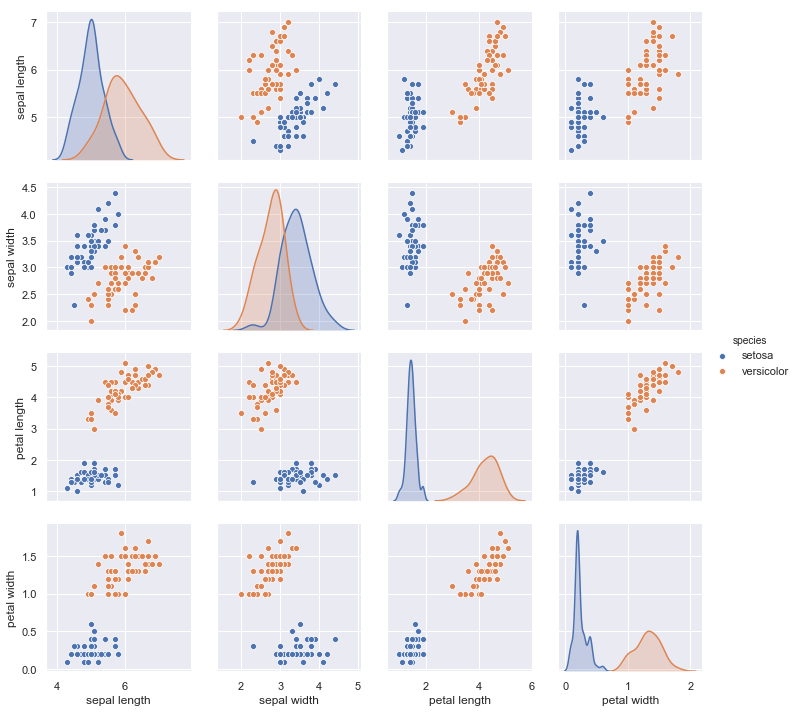

In [6]:
sns.pairplot(df, hue='species')

Split into train and test datasets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Scale the data.

In [8]:
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train a perceptron learner.

In [10]:
trainer = Perceptron(max_iter=40, eta0=0.1, random_state=42, tol=1e-3)

In [11]:
trainer.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

Use `trainer` to predict classes on test dataset.

In [12]:
y_pred = trainer.predict(X_test)

In [13]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0])

In [14]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0])

Check predicted accuracy score.

In [15]:
print(f'Test accuracy: {accuracy_score(y_test, y_pred):.2f}')

Test accuracy: 1.00


Check the null accuracy score.

In [16]:
dfy_test = pd.Series(y_test)
print(f'Null accuracy: {dfy_test.value_counts()[1]/(dfy_test.value_counts().sum()):.2f}')

Null accuracy: 0.67


Confusion Matrix.

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0],
       [ 0, 20]], dtype=int64)

<div class="alert alert-success">
    <b> EXCERCISE: </b>
    
   <ul>
    <li> Train a Perceptron model with all 3 classes and compute accuracy. Do you notice a degrade in performance ? </li> 
   </ul>
</div>

# Multi-layer Perceptron (MLP)

Multi-layer perceptron is a type of network where multiple layers of a group of perceptron are stacked together to make a model. If we stack a bunch of these perceptrons together, it becomes a hidden layer which is also known as a Dense layer in modern deep learning terminology. This is the building block of *Artificial Neural Networks*.

<img src="../data/mlp.png"> </img>